In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma, gammainc, gammaincc

In [7]:
data = np.loadtxt("../testout.csv", delimiter=";")
print(data)
print(data.mean())

[1781.  423.  853. ...  740. 1374. 2887.]
1288.5893


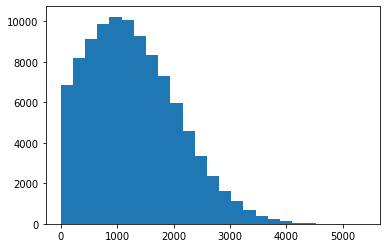

In [8]:
plt.hist(data, bins=25)
plt.show()

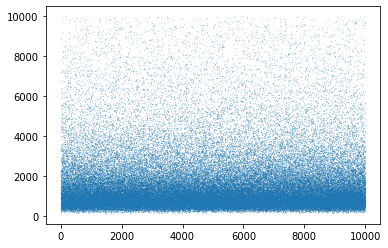

In [49]:
plt.scatter(x, data, s=0.01)
plt.show()

In [52]:
def taxiDistDistributionNormalized(x, m, k, x0=None, x1=None):
    z = x/m
    def unnormalized(x, m, k):
        return np.exp(-1/z)*z**(-k)
        
    if x0 and x1:
        norm = quad(lambda x: unnormalized(x, m, k), x0, x1)
        return unnormalized(x, m, k)/norm
    else:
        return unnormalized(x, m, k)

average:  (1407.0607282265998, 1.784991857989998e-05)


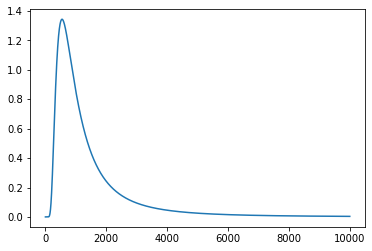

In [68]:
m_ = 2000
m = m_*gammaincc(3-2, m_/10000)*gamma(1)
x = np.linspace(0.001, 10000, len(data))
y = taxiDistDistributionNormalized(x, m, 3)
norm = quad(lambda x: taxiDistDistributionNormalized(x,m,3),0.001,10000)[0]
print("average: ", quad(lambda x: x*taxiDistDistributionNormalized(x, m, 3)/norm, 0.001, 10000))
plt.plot(x, y)

plt.show()

In [10]:
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
# plt.plot(data[:,0], 1/3*data[:,0]**3, ls='--')

plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed